In [52]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [48]:
pip install geopandas

In [49]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [50]:
zipcodes = gpd.read_file('./data/LakeCounty_Health_5114257871172773279.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:3435


,OBJECTID,County,Percent_1,geometry
0,1,McHenry County,27.7,"POLYGON ((883358.271 2122657.886, 888572.603 2..."
1,2,Boone County,33.7,"POLYGON ((883358.271 2122657.886, 883362.596 2..."
2,3,Ogle County,31.2,"POLYGON ((617161.942 2018203.086, 622481.577 2..."
3,4,Will County,28.0,"POLYGON ((1003871.064 1842165.938, 1003869.036..."
4,5,LaSalle County,27.1,"POLYGON ((818708.973 1807747.960, 818747.663 1..."


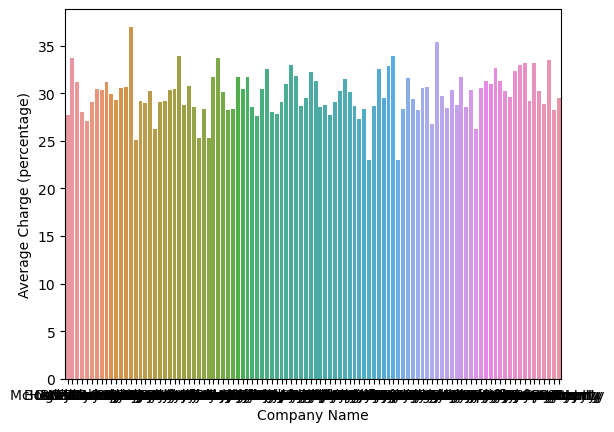

In [53]:
sns.barplot(x = 'County',y = 'Percent_1',data = zipcodes)
plt.xlabel("Company Name")
plt.ylabel("Average Charge (percentage)")
plt.show()

<Axes: xlabel='County'>

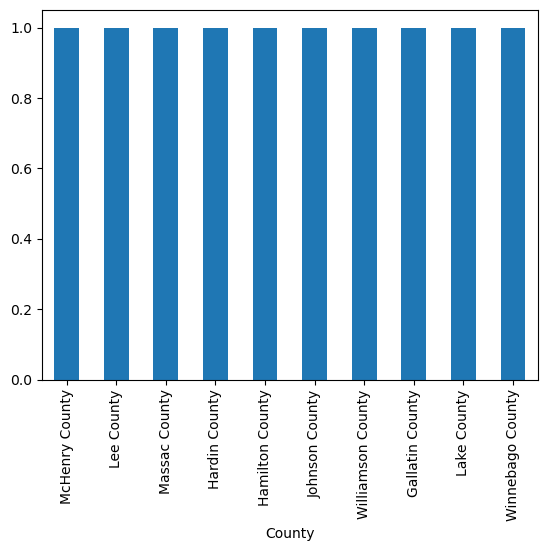

In [55]:
top_10 = (zipcodes['County'].value_counts()).iloc[:10]
top_10.plot(kind='bar')

In [40]:
print(zipcodes.loc[0, 'geometry'])

POLYGON ((883358.270845808 2122657.88609378, 888572.602995809 2122797.76903441, 888591.701182293 2122798.49084174, 893872.796552995 2122941.08779421, 893890.384222441 2122941.85669869, 899274.667035537 2123070.13205336, 903234.497287363 2123109.70207025, 904542.491777305 2123118.73667057, 904657.439376197 2123119.24756026, 905583.478290498 2123126.72218437, 909855.586585313 2123100.03825364, 909898.738274599 2123099.97104073, 915212.165961913 2123067.82869718, 915245.796112733 2123067.39914682, 920512.544036122 2123035.93640022, 920564.72878068 2123035.24437018, 925775.27748298 2123004.60357533, 925795.342365235 2123004.33368481, 931037.501961258 2122972.84273233, 931086.694572898 2122972.72835065, 936386.547812772 2122941.05367985, 936403.107987823 2122941.34710927, 941721.408423872 2122935.14149978, 946970.83477302 2122919.31486279, 952191.615869764 2122861.80263684, 957598.163630766 2122807.99790639, 962801.289633722 2122860.29057356, 967912.097513054 2122836.57214196, 973131.753627

In [41]:
zipcodes.loc(-95.8304,29.7404)

TypeError: _LocationIndexer.__call__() takes from 1 to 2 positional arguments but 3 were given

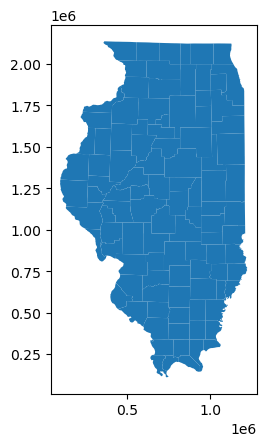

In [42]:
zipcodes.plot();

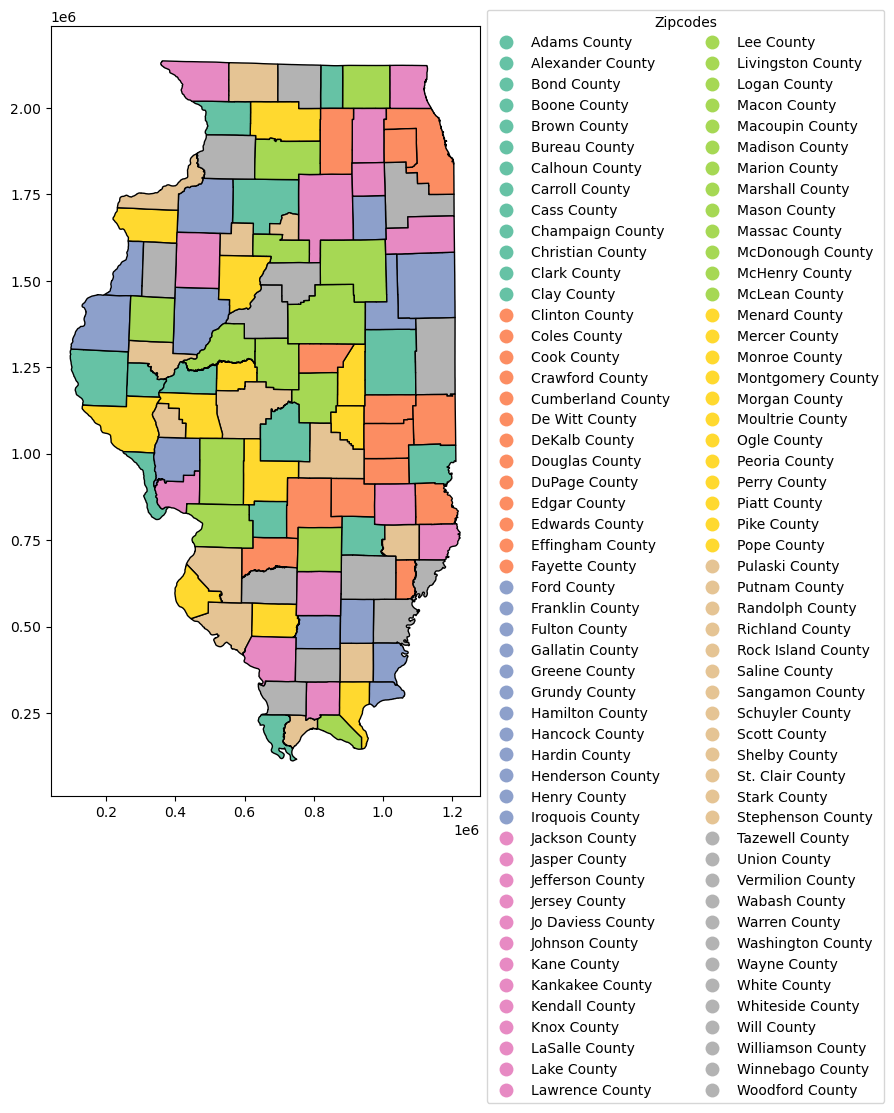

In [45]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'County', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [38]:
zipcodes = gpd.read_file('./data/school-zones.json')
print(zipcodes.crs)
zipcodes.head( )

DriverError: Failed to read ESRIJSON data

In [35]:
spots = pd.read_csv('./data/extra-activities.csv')
print(spots.shape)
spots.head(3)

(61, 6)


,name,type,address,Zip_Code,lat,lon
0,Math Logic Tutoring,math,"5323 Castle Discordia St, Katy, TX",77493,29.85059,-95.81509
1,Mathnasium of Morton Ranch,math,"22720 Morton Ranch Rd #140, Katy, TX",77449,29.81808,-95.76568
2,"The Tutoring Center, Katy TX",elar/math,"2001 Katy Mills Blvd # F, Katy, TX",77494,29.78339,-95.80607


In [32]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
spots_geo = gpd.GeoDataFrame(spots, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(spots.lon, spots.lat))